In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Importing Necessary Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import tensorflow as tf
import keras, cv2, os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D,AveragePooling2D, BatchNormalization
from keras import regularizers
from keras.layers.core import Dropout
import pickle, random

In [ ]:
def create_grayscale_training_data(DATADIR,CATEGORIES,training_data,IMG_SIZE):
    for catergoy in CATEGORIES:
        path = os.path.join(DATADIR, catergoy) #path to cats and dogs
        class_num = CATEGORIES.index(catergoy)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

def create_rgb_training_data(DATADIR,CATEGORIES,training_data,IMG_SIZE):
    for catergoy in CATEGORIES:
        path = os.path.join(DATADIR, catergoy) #path to cats and dogs
        class_num = CATEGORIES.index(catergoy)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

# Converting Images into GrayScale 

In [ ]:
DATADIR = "/content/drive/MyDrive/Cse465_Dataset_3k_Images"
grayscale_training_data = []
IMG_SIZE = 32
CATEGORIES = []
i = 1
while i != 61:
    CATEGORIES.append(str(i))
    i= i+1

In [ ]:
create_grayscale_training_data(DATADIR,CATEGORIES,grayscale_training_data,IMG_SIZE)
random.shuffle(grayscale_training_data)
print(len(grayscale_training_data))

3000


In [ ]:
X = []
y = []
for features, label in grayscale_training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1)

In [ ]:
pickle_out = open("GrayScaleDataset.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("GrayScaleLabels.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/Pickled Data/GrayScaleDataset.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Pickled Data/GrayScaleLabels.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X= X/255  #Normalize Training Data
y = np.array(y)
X.shape

(3000, 32, 32, 1)

# ANN


In [ ]:
ann = Sequential([
    Flatten(input_shape = X.shape[1:]),
    Dense(300,activation='relu'),
    Dropout(0.5),
    Dense(200,activation='relu'),
    Dropout(0.5),
    Dense(60,activation='softmax')
])

ann.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann_history= ann.fit (X, y, epochs=25,batch_size=32,validation_split=0.1)

Epoch 1/25
85/85 [==============================] - 1s 6ms/step - loss: 4.0711 - accuracy: 0.0356 - val_loss: 3.7723 - val_accuracy: 0.0833
Epoch 2/25
85/85 [==============================] - 0s 4ms/step - loss: 3.5651 - accuracy: 0.1226 - val_loss: 3.1699 - val_accuracy: 0.2433
Epoch 3/25
85/85 [==============================] - 0s 4ms/step - loss: 3.1091 - accuracy: 0.1996 - val_loss: 2.7863 - val_accuracy: 0.3333
Epoch 4/25
85/85 [==============================] - 0s 4ms/step - loss: 2.7386 - accuracy: 0.2774 - val_loss: 2.5336 - val_accuracy: 0.3633
Epoch 5/25
85/85 [==============================] - 0s 4ms/step - loss: 2.4483 - accuracy: 0.3356 - val_loss: 2.3640 - val_accuracy: 0.4033
Epoch 6/25
85/85 [==============================] - 0s 4ms/step - loss: 2.1914 - accuracy: 0.3937 - val_loss: 2.2521 - val_accuracy: 0.4300
Epoch 7/25
85/85 [==============================] - 0s 4ms/step - loss: 2.0300 - accuracy: 0.4344 - val_loss: 2.1896 - val_accuracy: 0.4367
Epoch 8/25
85/85 [==

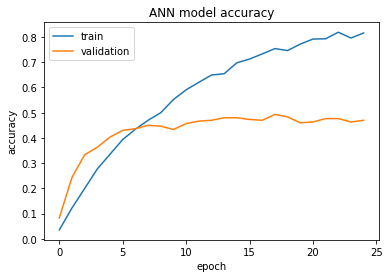

In [ ]:
#Accuracy
plt.plot(ann_history.history['accuracy'])
plt.plot(ann_history.history['val_accuracy'])
plt.title('ANN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.plot(figsize=(8,5))
#plt.savefig('ANN Model Accuracy')
plt.show()

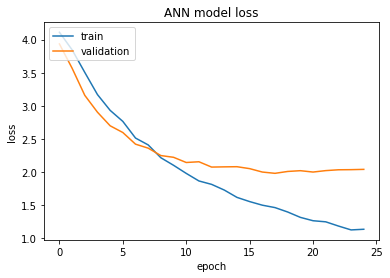

In [ ]:
# "Loss"
plt.plot(ann_history.history['loss'])
plt.plot(ann_history.history['val_loss'])
plt.title('ANN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#plt.savefig('ANN Model Loss')
plt.show()

# Simple CNN

In [ ]:
cnn = Sequential([

#Cnn
Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=X.shape[1:]),
BatchNormalization(),
MaxPool2D((2,2)),

Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
BatchNormalization(),
MaxPool2D((2,2)),

#dense
Flatten(),
Dense(300,activation='relu'),
Dropout(0.5),
Dense(200,activation='relu'),
Dropout(0.5),
Dense(60,activation='softmax')
])

cnn.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn_history= cnn.fit(X,y,epochs=30,batch_size=64,validation_split=0.1)

Epoch 1/30
43/43 [==============================] - 1s 16ms/step - loss: 4.3737 - accuracy: 0.0411 - val_loss: 3.9968 - val_accuracy: 0.0633
Epoch 2/30
43/43 [==============================] - 0s 10ms/step - loss: 3.6915 - accuracy: 0.1215 - val_loss: 4.3194 - val_accuracy: 0.0233
Epoch 3/30
43/43 [==============================] - 0s 10ms/step - loss: 3.3320 - accuracy: 0.1867 - val_loss: 5.2730 - val_accuracy: 0.0233
Epoch 4/30
43/43 [==============================] - 0s 10ms/step - loss: 3.0557 - accuracy: 0.2267 - val_loss: 6.5112 - val_accuracy: 0.0133
Epoch 5/30
43/43 [==============================] - 0s 10ms/step - loss: 2.7713 - accuracy: 0.2833 - val_loss: 7.6091 - val_accuracy: 0.0133
Epoch 6/30
43/43 [==============================] - 0s 10ms/step - loss: 2.5370 - accuracy: 0.3248 - val_loss: 7.0997 - val_accuracy: 0.0267
Epoch 7/30
43/43 [==============================] - 0s 10ms/step - loss: 2.3017 - accuracy: 0.3696 - val_loss: 7.1168 - val_accuracy: 0.0400
Epoch 8/30
43

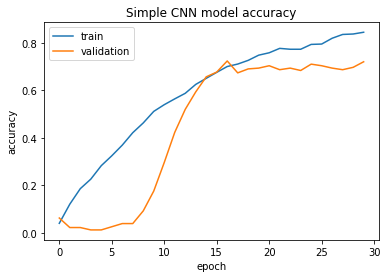

In [ ]:
#Accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('Simple CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Simple CNN Model Accuracy')
plt.show()

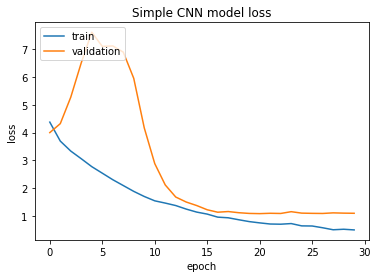

In [ ]:
# "Loss"
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('Simple CNN model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Simple CNN Model Loss')
plt.show()

# Lenet5

In [ ]:
#Lenet5

Lenet5= Sequential([
    Conv2D(6, kernel_size=(5,5),strides=1,padding='same',activation='tanh',input_shape=X.shape[1:]), #C1
    BatchNormalization(),
    AveragePooling2D(),
    Conv2D(16,kernel_size=(5,5),strides=1,activation='tanh',padding='valid'),
    BatchNormalization(),
    AveragePooling2D(),


    Flatten(),
    Dense(120,activation='tanh',kernel_regularizer=regularizers.l2(0.05)),
    Dropout(0.2),
    Dense(84,activation='tanh',kernel_regularizer=regularizers.l2(0.05)),
    Dropout(0.2),
    Dense(60,activation='softmax'),
])

Lenet5.compile(optimizer='adam',
            loss = 'sparse_categorical_crossentropy',
            metrics=['accuracy'])

Lenet5_history= Lenet5.fit(X,y,epochs=50,batch_size=64,validation_split=0.1)

Epoch 1/50
43/43 [==============================] - 1s 14ms/step - loss: 14.0433 - accuracy: 0.0974 - val_loss: 10.0622 - val_accuracy: 0.1700
Epoch 2/50
43/43 [==============================] - 0s 7ms/step - loss: 7.5106 - accuracy: 0.2604 - val_loss: 6.1558 - val_accuracy: 0.2300
Epoch 3/50
43/43 [==============================] - 0s 7ms/step - loss: 4.9132 - accuracy: 0.2859 - val_loss: 4.5531 - val_accuracy: 0.2633
Epoch 4/50
43/43 [==============================] - 0s 8ms/step - loss: 3.8761 - accuracy: 0.3178 - val_loss: 3.8494 - val_accuracy: 0.3067
Epoch 5/50
43/43 [==============================] - 0s 7ms/step - loss: 3.4365 - accuracy: 0.3274 - val_loss: 3.5784 - val_accuracy: 0.2500
Epoch 6/50
43/43 [==============================] - 0s 7ms/step - loss: 3.1995 - accuracy: 0.3433 - val_loss: 3.3331 - val_accuracy: 0.3067
Epoch 7/50
43/43 [==============================] - 0s 7ms/step - loss: 3.0591 - accuracy: 0.3581 - val_loss: 3.2410 - val_accuracy: 0.2900
Epoch 8/50
43/43 

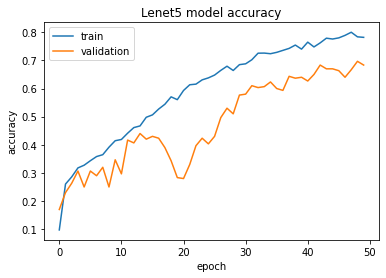

In [ ]:
#Accuracy
plt.plot(Lenet5_history.history['accuracy'])
plt.plot(Lenet5_history.history['val_accuracy'])
plt.title('Lenet5 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Lenet5 Model Accuracy')
plt.show()

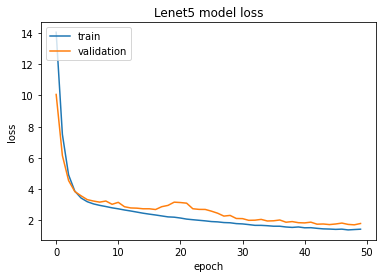

In [ ]:
# "Loss"
plt.plot(Lenet5_history.history['loss'])
plt.plot(Lenet5_history.history['val_loss'])
plt.title('Lenet5 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Lenet5 Model Loss')
plt.show()

# Alexnet

In [ ]:
DATADIR = "/content/drive/MyDrive/Cse465_Dataset_3k_Images"
rgb_training_data = []
IMG_SIZE = 227
CATEGORIES = []
i = 1
while i != 61:
    CATEGORIES.append(str(i))
    i= i+1

In [ ]:
#Loading Dataset and printing total image numbers (33600)
create_rgb_training_data(DATADIR,CATEGORIES,rgb_training_data,IMG_SIZE)
random.shuffle(rgb_training_data)
print(len(rgb_training_data))

3000


In [ ]:
X = []
y = []
for features, label in rgb_training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,3)

In [ ]:
pickle_out = open("DatasetAlexNet.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("LabelsAlexNet.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("/content/drive/MyDrive/Pickled Data/DatasetAlexNet.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Pickled Data/LabelsAlexNet.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X= X/255  #Normalize Training data
y = np.array(y)
X.shape

(3000, 227, 227, 3)

In [ ]:
alexnet_model = Sequential([
    Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=X.shape[1:]),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(60, activation='softmax')
])

alexnet_model.compile(loss='sparse_categorical_crossentropy', 
                      optimizer=tf.optimizers.SGD(learning_rate=0.001,momentum=0.9,), 
                      metrics=['accuracy'])

alexnet_history = alexnet_model.fit(X,y, epochs=90,batch_size=128,validation_split=0.1)

Epoch 1/90
22/22 [==============================] - 41s 403ms/step - loss: 5.7952 - accuracy: 0.0411 - val_loss: 3.9710 - val_accuracy: 0.0967
Epoch 2/90
22/22 [==============================] - 6s 288ms/step - loss: 3.7067 - accuracy: 0.1389 - val_loss: 3.6271 - val_accuracy: 0.2133
Epoch 3/90
22/22 [==============================] - 6s 289ms/step - loss: 2.9087 - accuracy: 0.2659 - val_loss: 3.2517 - val_accuracy: 0.3567
Epoch 4/90
22/22 [==============================] - 6s 289ms/step - loss: 2.4366 - accuracy: 0.3652 - val_loss: 2.8712 - val_accuracy: 0.4400
Epoch 5/90
22/22 [==============================] - 6s 289ms/step - loss: 2.0696 - accuracy: 0.4407 - val_loss: 2.7267 - val_accuracy: 0.4267
Epoch 6/90
22/22 [==============================] - 6s 292ms/step - loss: 1.8042 - accuracy: 0.4919 - val_loss: 2.6520 - val_accuracy: 0.4033
Epoch 7/90
22/22 [==============================] - 6s 292ms/step - loss: 1.5408 - accuracy: 0.5559 - val_loss: 2.5890 - val_accuracy: 0.3700
Epoch

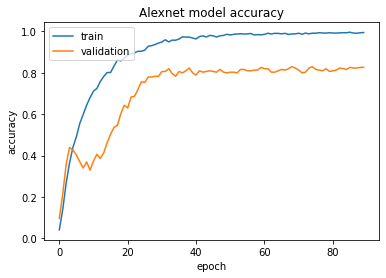

In [ ]:
#Accuracy
plt.plot(alexnet_history.history['accuracy'])
plt.plot(alexnet_history.history['val_accuracy'])
plt.title('Alexnet model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Alexnet Model Accuracy')
plt.show()

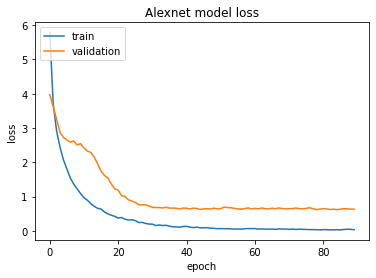

In [ ]:
# "Loss"
plt.plot(alexnet_history.history['loss'])
plt.plot(alexnet_history.history['val_loss'])
plt.title('Alexnet model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Alexnet Model Loss')
plt.show()

# Vgg16

In [ ]:
DATADIR = "/content/drive/MyDrive/Cse465_Dataset_3k_Images"
rgb_training_data = []
IMG_SIZE = 224
CATEGORIES = []
i = 1
while i != 61:
    CATEGORIES.append(str(i))
    i= i+1

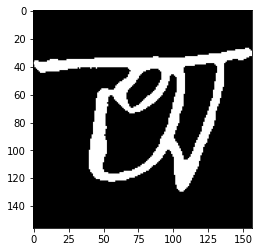

In [ ]:
#Checking Images in Dataset
for catergoy in CATEGORIES:
    path = os.path.join(DATADIR, catergoy) #path to dataset
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [ ]:
#Loading Dataset and printing total image numbers (33600)
create_rgb_training_data(DATADIR,CATEGORIES,rgb_training_data,IMG_SIZE)

In [ ]:
random.shuffle(rgb_training_data)
print(len(rgb_training_data))

In [ ]:
X = []
y = []
for features, label in rgb_training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,3)

In [ ]:
pickle_in = open("/content/drive/MyDrive/Pickled Data/RGBDataset.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Pickled Data/RGBLabels.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X= X/255  #Normalize Training data
y = np.array(y)
X.shape

(3000, 224, 224, 3)

In [ ]:
VGG = tf.keras.applications.vgg16.VGG16(input_shape=X.shape[1:],include_top = False,weights='imagenet')
VGG.trainable = False

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg_model = Sequential([
    VGG,
    Flatten(),
    Dense(units=4096,activation='relu'),
    Dropout(0.25),
    Dense(units=4096,activation='relu'),
    Dropout(0.25),
    Dense(units=60,activation='softmax')
])

vgg_model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

vgg_history = vgg_model.fit(X,y, epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
85/85 [==============================] - 65s 346ms/step - loss: 4.6036 - accuracy: 0.1778 - val_loss: 1.7313 - val_accuracy: 0.4767
Epoch 2/10
85/85 [==============================] - 25s 298ms/step - loss: 1.6865 - accuracy: 0.4941 - val_loss: 1.2938 - val_accuracy: 0.5900
Epoch 3/10
85/85 [==============================] - 26s 301ms/step - loss: 1.1807 - accuracy: 0.6256 - val_loss: 1.1712 - val_accuracy: 0.6333
Epoch 4/10
85/85 [==============================] - 26s 302ms/step - loss: 1.0015 - accuracy: 0.6896 - val_loss: 0.9822 - val_accuracy: 0.7033
Epoch 5/10
85/85 [==============================] - 26s 302ms/step - loss: 0.8274 - accuracy: 0.7326 - val_loss: 0.7780 - val_accuracy: 0.7533
Epoch 6/10
85/85 [==============================] - 26s 303ms/step - loss: 0.6480 - accuracy: 0.7915 - val_loss: 0.8174 - val_accuracy: 0.7633
Epoch 7/10
85/85 [==============================] - 26s 303ms/step - loss: 0.6631 - accuracy: 0.7926 - val_loss: 0.6665 - val_accuracy: 0.7667

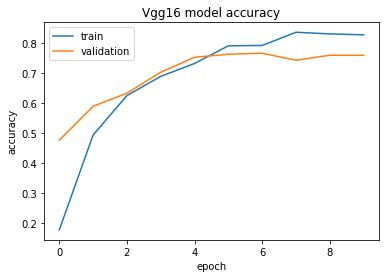

In [ ]:
#Accuracy
plt.plot(vgg_history.history['accuracy'])
plt.plot(vgg_history.history['val_accuracy'])
plt.title('Vgg16 model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('Vgg16 Model Accuracy')
plt.show()

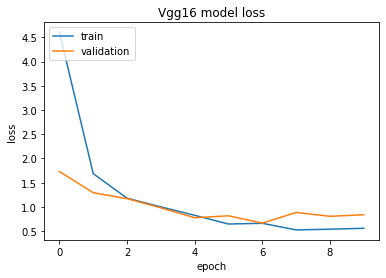

In [ ]:
# "Loss"
plt.plot(vgg_history.history['loss'])
plt.plot(vgg_history.history['val_loss'])
plt.title('Vgg16 model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('VGG16 Model Loss')
plt.show()

# ZF Net

In [ ]:
pickle_in = open("/content/drive/MyDrive/Pickled Data/DatasetAlexNet.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("/content/drive/MyDrive/Pickled Data/LabelsAlexNet.pickle","rb")
y = pickle.load(pickle_in)

In [ ]:
X= X/255  #Normalize Training data
y = np.array(y)
X.shape

(3000, 227, 227, 3)

In [ ]:
ZFnet_model = Sequential([
    Conv2D(filters=96, kernel_size=(7,7), strides=(2,2), activation='relu', input_shape=X.shape[1:]),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=1024, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    Conv2D(filters=512, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3), strides=(2,2)),
    
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(60, activation='softmax')
])

ZFnet_model.compile(loss='sparse_categorical_crossentropy', 
                      optimizer=tf.optimizers.SGD(learning_rate=0.001,momentum=0.9,), 
                      metrics=['accuracy'])

ZFnet__history = ZFnet_model.fit(X,y, epochs=50,batch_size=64,validation_split=0.1)

Epoch 1/50
43/43 [==============================] - 73s 1s/step - loss: 5.8212 - accuracy: 0.0974 - val_loss: 2.9947 - val_accuracy: 0.2767
Epoch 2/50
43/43 [==============================] - 36s 846ms/step - loss: 3.0036 - accuracy: 0.2848 - val_loss: 2.6614 - val_accuracy: 0.3367
Epoch 3/50
43/43 [==============================] - 36s 845ms/step - loss: 2.4525 - accuracy: 0.3789 - val_loss: 2.8546 - val_accuracy: 0.2667
Epoch 4/50
43/43 [==============================] - 36s 848ms/step - loss: 1.9494 - accuracy: 0.4748 - val_loss: 2.9208 - val_accuracy: 0.2633
Epoch 5/50
43/43 [==============================] - 36s 848ms/step - loss: 1.6378 - accuracy: 0.5433 - val_loss: 2.9029 - val_accuracy: 0.2533
Epoch 6/50
43/43 [==============================] - 36s 847ms/step - loss: 1.3427 - accuracy: 0.6126 - val_loss: 2.7686 - val_accuracy: 0.3000
Epoch 7/50
43/43 [==============================] - 36s 846ms/step - loss: 1.1248 - accuracy: 0.6644 - val_loss: 2.3569 - val_accuracy: 0.3900
Ep

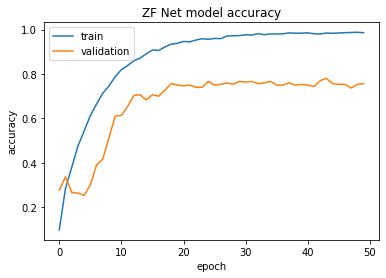

In [ ]:
#Accuracy
plt.plot(ZFnet__history.history['accuracy'])
plt.plot(ZFnet__history.history['val_accuracy'])
plt.title('ZF Net model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('ZF Net Model Accuracy')
plt.show()

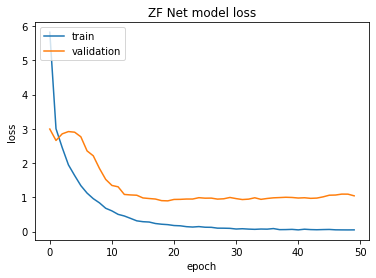

In [ ]:
# "Loss"
plt.plot(ZFnet__history.history['loss'])
plt.plot(ZFnet__history.history['val_loss'])
plt.title('ZF Net model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig('ZF Net Model Loss')
plt.show()

# New Section

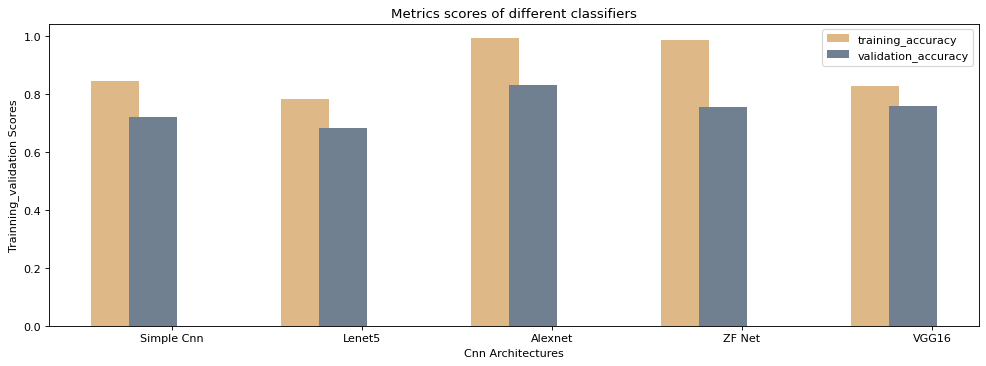

In [ ]:
labels = ['Simple Cnn', 'Lenet5', 'Alexnet','ZF Net', 'VGG16']
training_accuracy = [0.844, 0.782, 0.993, 0.985 ,0.828]
validation_accuracy = [0.720, 0.683, 0.833, 0.757, 0.760]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars
plt.figure(figsize =(15,5), dpi= 80)
# plot data in grouped manner of bar type
plt.bar(x-0.2, training_accuracy, width, color='burlywood')
plt.bar(x, validation_accuracy, width, color='slategrey')


plt.title("Metrics scores of different classifiers")
plt.xticks(x+0.1, ['Simple Cnn', 'Lenet5', 'Alexnet','ZF Net', 'VGG16'])
plt.xlabel("Cnn Architectures")
plt.ylabel("Trainning_validation Scores")
plt.legend(["training_accuracy", "validation_accuracy"],loc='upper right')
plt.savefig("Scores of different architectures")
plt.show()